<a href="https://colab.research.google.com/github/Thiago-Reis5/2SIB-ProjetoEstacionamento2021/blob/main/Check1_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/lab05/HSV_colorspace.jpg /content 
!wget https://raw.githubusercontent.com/Thiago-Reis5/Checkpoint-FIAP-AI/main/Material/circulo.png /content

--2023-03-12 15:41:02--  https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/lab05/HSV_colorspace.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20800 (20K) [image/jpeg]
Saving to: ‘HSV_colorspace.jpg’

HSV_colorspace.jpg  100%[===================>]  20.31K  --.-KB/s    in 0.001s  

2023-03-12 15:41:02 (16.2 MB/s) - ‘HSV_colorspace.jpg’ saved [20800/20800]

/content: Scheme missing.
FINISHED --2023-03-12 15:41:02--
Total wall clock time: 0.3s
Downloaded: 1 files, 20K in 0.001s (16.2 MB/s)
--2023-03-12 15:41:02--  https://raw.githubusercontent.com/Thiago-Reis5/Checkpoint-FIAP-AI/main/Material/circulo.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, .

In [6]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


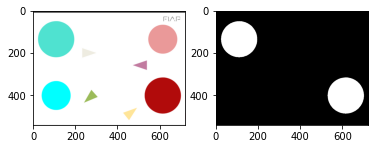

In [317]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
img_hsv2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  

#image_lower_hsv = np.array([0, 1, 0])  
#image_upper_hsv = np.array([170, 255, 255])

#mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)
mask_hsv = cv2.inRange(img_hsv,(86, 165, 100), (100, 170, 250) )
mask_hsv2 = cv2.inRange(img_hsv2,(0, 200, 20), (15, 255, 255) )

mask_hsv_juntas = mask_hsv + mask_hsv2


plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask_hsv_juntas, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

In [320]:
contornos, _ = cv2.findContours(mask_hsv_juntas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

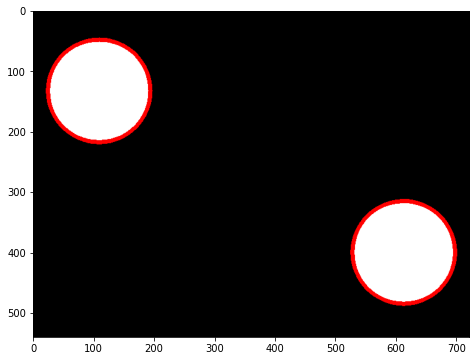

In [322]:
mask_rgb = cv2.cvtColor(mask_hsv_juntas, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"


cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);
#plt.figure(figsize=(8,6))
#plt.imshow(contornos_img2);

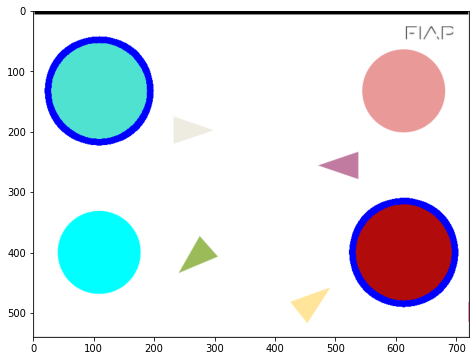

In [323]:
mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"


cv2.drawContours(img_rgb, contornos, -1, [0, 0, 255], 10);

plt.figure(figsize=(8,6))
plt.imshow(img_rgb);



centro de massa na possição:  108 133
centro de massa na possição:  612 399
O centro da imagem e igual a : 266
A distancia entre A(108, 133) e B(399, 612) é igual a: 560.47


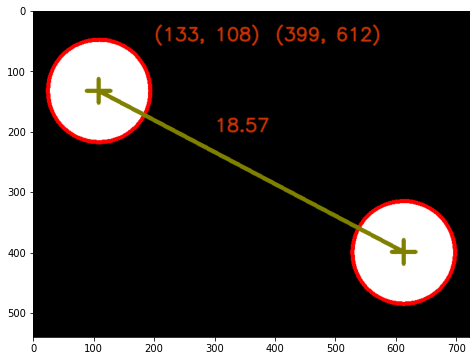

In [379]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
img_hsv2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  

#image_lower_hsv = np.array([0, 1, 0])  
#image_upper_hsv = np.array([170, 255, 255])

#mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)
mask_hsv = cv2.inRange(img_hsv,(86, 165, 100), (100, 170, 250) )
mask_hsv2 = cv2.inRange(img_hsv2,(0, 200, 20), (15, 255, 255) )

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos2, _ = cv2.findContours(mask_hsv2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contornos[0]
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print("centro de massa na possição: ",cx, cy)

cnt2 = contornos2[0]
M2 = cv2.moments(cnt2)
cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])
print("centro de massa na possição: ",cx2, cy2)

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

mask_rgb2 = cv2.cvtColor(mask_hsv2, cv2.COLOR_GRAY2RGB) 
contornos_img2 = mask_rgb2.copy() # Cópia da máscara para ser desenhada "por cima"
mask_rgb_juntas = mask_rgb + mask_rgb2

# Desenhando o contorno da cruz
cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);
cv2.drawContours(contornos_img2, contornos2, -1, [255, 0, 0], 5);

# Desenhando o contorno da cruz
cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

cv2.line(contornos_img2,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img2,(cx2,cy2 - size),(cx2, cy2 + size),color,5)

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (200,50)

font2 = cv2.FONT_HERSHEY_SIMPLEX
text2 = cy2 , cx2
origem2 = (400,50)

contornos_juntos = contornos_img + contornos_img2


#descobrindo o centro
centro = (cy2 - cy)
print(f"O centro da imagem e igual a : {centro}")

#traçar a linha
cv2.line(contornos_juntos,(cx,cy),(cx2,cy2),color,5)

# Mostra a cruz
cv2.putText(contornos_juntos, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(contornos_juntos, str(text2), origem2, font2,1,(200,50,0),2,cv2.LINE_AA)


#retas
A = (108, 133)
B = (399, 612)
C = (108, 399)

#Cálculo do coeficiente angular
centroy = cy2 - cy
centrox = cx2 - cx
m = (centroy - cy)/(centrox - cx)
atan = math.atan(m)
deg = math.degrees(atan)

#Apresentando os Graus
font3 = cv2.FONT_HERSHEY_SIMPLEX
text3 = round(deg,2)
origem3 = (300,200)
cv2.putText(contornos_juntos, str(text3), origem3, font3,1,(200,50,0),2,cv2.LINE_AA)



hispotenusa = math.sqrt((B[0]-A[0])**2 + (B[1] - A[1])**2)
print(f"A distancia entre A{A} e B{B} é igual a: {round(hispotenusa,2)}")





plt.figure(figsize=(8,6))
plt.imshow(contornos_juntos)
plt.show()




centro de massa na possição:  108 133
centro de massa na possição:  612 399
A distancia entre A(108, 133) e B(399, 612) é igual a: 560.47
A distancia entre C(108, 399) e A(108, 133) é igual a: 266.0
A distancia entre C(108, 399) e B(399, 612) é igual a: 360.62
O valor de seno é de : 0.47
O valor de ang é de : 0


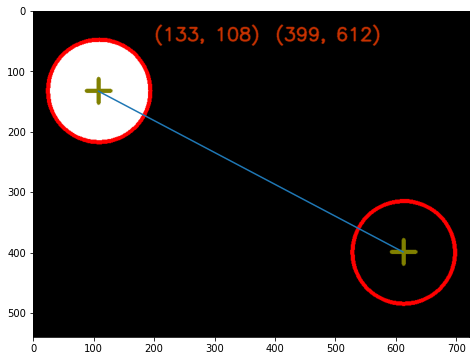

In [345]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
img_hsv2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  

#image_lower_hsv = np.array([0, 1, 0])  
#image_upper_hsv = np.array([170, 255, 255])

#mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)
mask_hsv = cv2.inRange(img_hsv,(86, 165, 100), (100, 170, 250) )
mask_hsv2 = cv2.inRange(img_hsv2,(0, 200, 20), (15, 255, 255) )
mask_juntas = mask_hsv + mask_hsv2

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos2, _ = cv2.findContours(mask_hsv2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contorno_juntos = contornos + contornos2

cnt = contornos[0]
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print("centro de massa na possição: ",cx, cy)

cnt2 = contornos2[0]
M2 = cv2.moments(cnt2)
cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])
print("centro de massa na possição: ",cx2, cy2)

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

mask_rgb2 = cv2.cvtColor(mask_hsv2, cv2.COLOR_GRAY2RGB) 
contornos_img2 = mask_rgb2.copy() # Cópia da máscara para ser desenhada "por cima"

# Desenhando o contorno da cruz
cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);
cv2.drawContours(contornos_img, contornos2, -1, [255, 0, 0], 5);

# Desenhando o contorno da cruz
cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (200,50)

font2 = cv2.FONT_HERSHEY_SIMPLEX
text2 = cy2 , cx2
origem2 = (400,50)



# Mostra a cruz
cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(text2), origem2, font2,1,(200,50,0),2,cv2.LINE_AA)


#retas
A = (108, 133)
B = (399, 612)
C = (108, 399)


hispotenusa = math.sqrt((B[0]-A[0])**2 + (B[1] - A[1])**2)
print(f"A distancia entre A{A} e B{B} é igual a: {round(hispotenusa,2)}")
catetoOposto = math.sqrt((C[0]-A[0])**2 + (C[1] - A[1])**2)
print(f"A distancia entre C{C} e A{A} é igual a: {round(catetoOposto,2)}")
catetoAdjacente = math.sqrt((C[0]-B[0])**2 + (C[1] - B[1])**2)
print(f"A distancia entre C{C} e B{B} é igual a: {round(catetoAdjacente,2)}")


seno = (catetoOposto/hispotenusa)
print(f"O valor de seno é de : {round(seno,2)}")
angulo = math.sin(seno)
print(f"O valor de ang é de : {round(angulo)}")




plt.figure(figsize=(8,6))
#plt.plot([A], [B])
plt.imshow(contornos_img)
plt.plot([108, 612], [133, 399])
plt.show()


